# Analyzing Customer Purchase Behavior

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

### * Read Dataset *

In [100]:
df = pd.read_excel("online_retail_II.xlsx")
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### * Size of Dataset *

In [101]:
print("Num of instances: ", df.shape[0])
print("Num of attributes: ", df.shape[1])

Num of instances:  525461
Num of attributes:  8


### * Attributes *

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


<b>Numerical Attributes</b>
<li>Quantity</li>
<li>Price </li>
<li>Customer ID</li>



<b>Categorical Attributes</b>
<li>Invoice</li>
<li>StockCode</li>
<li>Country</li>



<b>Date Time Attributes</b>
<li>InvoiceDate</li>



### * Description of Data *

In [103]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


<b>Observations</b>
<li>Above decription is all about numerical attributes.</li>
<li>Some of the Customer IDs are missing from the data.</li>
<li>Usually customers purchase 10 items.</li>
<li>Average price of the item is Rs.5 and at max it is around 25k.</li>
<li>Quantity and Price have negative values. It may be due to canceled transactions. Canceled transactions is indicated by invoice number which starts with letter 'c'. Probably transactions with negative values of quantity are canceled.</li>


In [104]:
cancel_trans = df[df['Invoice'].astype(str).str.contains('C')]
cancel_trans.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [105]:
print("No of cancelled transactions: ", len(cancel_trans))
print("Total number of transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())

No of cancelled transactions:  10206
Total number of transaction with negative quantity: 12326


In [106]:
df[df['Price'] == 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom


In [107]:
df[df['Price'] < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [108]:
d = df[~df['Invoice'].astype(str).str.contains('C')]  
print("Number of of transactions with negative quantity value among non cancelled transactions:" ,len(d[d['Quantity']<=0]))
print("Number of of transactions with zero price and negative quantity" ,len(d[(d['Quantity']<=0) & (d['Price'] == 0)]))


print("Percentage of cancelled transactions:" , round(len(cancel_trans)/len(df)*100, 2),"%")
print("Precentage of transactions with zero or negative price" ,round(len(df[df['Price']<=0])/len(df)*100, 2),"%")

Number of of transactions with negative quantity value among non cancelled transactions: 2121
Number of of transactions with zero price and negative quantity 2121
Percentage of cancelled transactions: 1.94 %
Precentage of transactions with zero or negative price 0.7 %


In [109]:
data = df[(df['Price'] > 0) & (df['Quantity']>0)]

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511566 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      511566 non-null  object        
 1   StockCode    511566 non-null  object        
 2   Description  511566 non-null  object        
 3   Quantity     511566 non-null  int64         
 4   InvoiceDate  511566 non-null  datetime64[ns]
 5   Price        511566 non-null  float64       
 6   Customer ID  407664 non-null  float64       
 7   Country      511566 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.1+ MB


### * Duplicates *

In [111]:
print("Num of duplicated transactions: ", len(data[data.duplicated()]))
#print("Number of duplicated transactions:", len(data[data.duplicated()]))

Num of duplicated transactions:  6835


In [112]:
data.drop_duplicates(inplace = True)

/tmp/ipykernel_6689/3807336157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace = True)


In [113]:
data = data.dropna(subset=['Customer ID'])

### * Null Values *

In [114]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [115]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## <center> Exploring Each Attribute

### * Item Description *

In [116]:
data['Description'] = data['Description'].str.lower()
print("Num of unique descriptions: ", len(data['Description'].unique().tolist()))
data['Description'] = data['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True) 
print("Num of unique descriptions:", len(data['Description'].unique().tolist()))

Num of unique descriptions:  4444
Num of unique descriptions: 4403


### * StockCode *

In [117]:
data = data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]
len(data['StockCode'].unique().tolist())

4006

### * DateTime *

In [118]:
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year
data['WeekDay'] = data['InvoiceDate'].dt.day_name()
data['month_year'] = pd.to_datetime(data[['year', 'month']].assign(Day=1))
data['hour'] = data['InvoiceDate'].dt.hour
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,month,year,WeekDay,month_year,hour
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,Tuesday,2009-12-01,7
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,Tuesday,2009-12-01,7
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,Tuesday,2009-12-01,7
3,489434,22041,record frame 7 single size,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,2009,Tuesday,2009-12-01,7
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,2009,Tuesday,2009-12-01,7


In [119]:
data['revenue'] = data['Price'] * data['Quantity']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399552 entries, 0 to 525460
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      399552 non-null  object        
 1   StockCode    399552 non-null  object        
 2   Description  399552 non-null  object        
 3   Quantity     399552 non-null  int64         
 4   InvoiceDate  399552 non-null  datetime64[ns]
 5   Price        399552 non-null  float64       
 6   Customer ID  399552 non-null  float64       
 7   Country      399552 non-null  object        
 8   month        399552 non-null  int64         
 9   year         399552 non-null  int64         
 10  WeekDay      399552 non-null  object        
 11  month_year   399552 non-null  datetime64[ns]
 12  hour         399552 non-null  int64         
 13  revenue      399552 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(5)
memory usage: 45.7+ MB


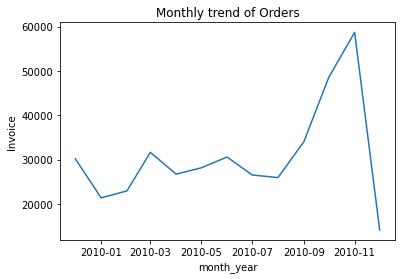

In [125]:
plot = pd.DataFrame(data.groupby(['month_year'])['Invoice'].count()).reset_index()
plot2 = pd.DataFrame(data.groupby(['WeekDay'])['Invoice'].count())
plot3 = pd.DataFrame(data.groupby(['hour'])['Invoice'].count()).reset_index()
plot4 = pd.DataFrame(data.groupby(['month_year'])['revenue'].mean()).reset_index()
plot5 = pd.DataFrame(data.groupby(['month_year'])['revenue'].sum()).reset_index()
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()
ax = sns.lineplot(x="month_year", y="Invoice", data = plot).set(title='Monthly trend of Orders')


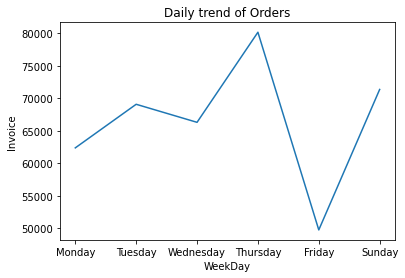

In [126]:
ax = sns.lineplot(x="WeekDay", y="Invoice", data = plot2).set(title='Daily trend of Orders')


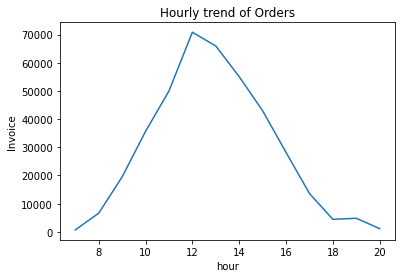

In [127]:
ax = sns.lineplot(x="hour", y="Invoice", data = plot3).set(title='Hourly trend of Orders')


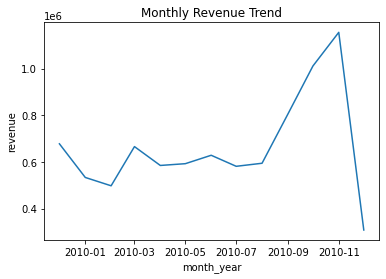

In [128]:
ax = sns.lineplot(x = 'month_year', y='revenue', data = plot5).set(title='Monthly Revenue Trend')

<b>Observations</b>
<li>At the end of year, purchasing is higher.</li>
<li>Shopping rate on weekend is relatively higher as compared to week days.</li>
<li>People rush towards shopping after noon.</li>
<li>Revenue generated in last months of year is greater because of high shopping rate.</li>


### * Price *

In [129]:
item = data[data['Price']>50]['Description'].unique().tolist()

In [130]:
print("Items > 50% consumption: ", len(item))

Items > 50% consumption:  19


### * Country *

In [131]:
print("Transactions made in ", len(data['Country'].unique().tolist()), " countries")

Transactions made in  37  countries


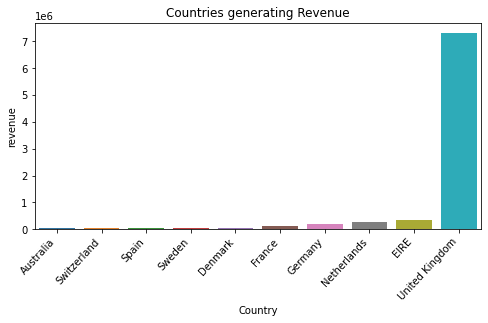

In [132]:
plot6 = pd.DataFrame(data.groupby(['Country'])['revenue'].sum()).reset_index()
plot6 = plot6.sort_values(['revenue']).reset_index(drop=True)
plot7 = pd.DataFrame(data.groupby(['Country'])['revenue'].count()).reset_index()
plot7 = plot7.sort_values(['revenue']).reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches(8, 3.8)
ax = sns.barplot(x = 'Country', y='revenue', data=plot6.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.title("Countries generating Revenue")
plt.show()



In [133]:
df_uk = data[data['Country'] == "United Kingdom"]
df_uk.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,month,year,WeekDay,month_year,hour,revenue
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,Tuesday,2009-12-01,7,83.4
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,Tuesday,2009-12-01,7,81.0
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,Tuesday,2009-12-01,7,81.0
3,489434,22041,record frame 7 single size,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,2009,Tuesday,2009-12-01,7,100.8
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,2009,Tuesday,2009-12-01,7,30.0


In [134]:
import datetime as dt
presence = dt.datetime(2011,12,10)
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])

/tmp/ipykernel_6689/2802060990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])


In [135]:
rfm = df_uk.groupby('Customer ID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'Invoice': lambda x: len(x), 'revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency', 
                         'Invoice': 'frequency', 
                         'revenue': 'monetary_value'}, inplace=True)
rfm.head()

,recency,frequency,monetary_value
Customer ID,,,
12346.0,529,24,169.36
12608.0,404,16,415.79
12745.0,486,22,723.85
12746.0,540,17,254.55
12747.0,369,153,5061.03


In [136]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

rfm_segments= rfm

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)

rfm_segments.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer ID,,,,,,,
12346.0,529,24,169.36,4,3,4,434
12608.0,404,16,415.79,2,4,3,243
12745.0,486,22,723.85,3,3,2,332
12746.0,540,17,254.55,4,4,4,444
12747.0,369,153,5061.03,1,1,1,111


In [143]:
print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print("______________________________ \n")
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("______________________________ \n")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("______________________________ \n")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print("______________________________ \n")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)") 

Champions:  378 ( 9.56 %)
______________________________ 

Loyal Customers:  979 ( 24.77 %)
______________________________ 

Big Spenders:  988 ( 24.99 %)
______________________________ 

About to Sleep:  140 ( 3.54 %)
______________________________ 

Lost Customers:  348 ( 8.8 %)
